In [56]:
#all import statements
import os
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [57]:

# model_directory = 'saved_models'
# model_filename = 'linear_regression_model.pth'
# model_file_path = os.path.join(model_directory, model_filename)

# # Ensure the directory exists, create it if it doesn't
# os.makedirs(model_directory, exist_ok=True)
# # Function to load or initialize the model
# def load_or_initialize_model(X_train, y_train):

#     # Load the model if it exists, otherwise initialize a new model
#     if os.path.exists(model_file_path):
#         print('Model exist so using it')
#         # input_size = X_train.shape[1]
#         # model = nn.Linear(input_size, 1).double()
#         # torch.save(model, model_file_path)
#         model = torch.load(model_file_path)
#     else:
#         print('Model does not exist so initialising from scratch')
#         input_size = X_train.shape[1]
#         model = nn.Linear(input_size, 1).double()
#         torch.save(model, model_file_path)
#     return model

In [58]:
#function to train the model
def modeltrain(X_train, y_train,l2_lambda=0.01):  # Specify the regularization strength (lambda)
    # global model
    input_size = X_train.shape[1]
    model = nn.Linear(input_size, 1).double()  # Double data type for weight tensor

    # Define loss function and optimizer with L2 regularization
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l2_lambda)  # Adding weight decay for L2 regularization

    # Train the model (rest of the code remains the same)
    num_epochs = 1000

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train.double())  # Ensure input data type matches model's weight data type
        loss = criterion(outputs, y_train.view(-1, 1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    print('Training Done')
    return model


In [59]:
#function to test the model

def modeltest(X_test,y_test,model):
    print("Testing starting")
    
    # Assuming 'model' is your trained linear regression model
 
    with torch.no_grad():
        predictions = model(X_test)



    print('testing over now accuracy analysis')

    correct_pred=0
    for i in range(len(predictions)):
       
        if(abs(predictions[i]-y_test[i])<0.5):
            
            correct_pred+=1
    mean_accuracy=(correct_pred/len(predictions))*100
    print(f'Percentage Accuracy: {mean_accuracy:.2f}%')

    #loop used to extract few records for prediction of model on new data points
    # for i in range(8):
    #     print("prediction=",predictions[i],"target=",y_test[i],X_test[i][0])
    

    #Calculation of mae,mse and r2 squared 
    mae = (mean_absolute_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions.numpy())
    

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Printing  the model parameters (coefficients)
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.data.numpy()}')

    return predictions

    

In [60]:

def create_plot(X,y,z):
   
    feature_to_plot=[]
    list2=[]
    for i in range(len(X)):
        feature_to_plot.append(i+1)
        
    feature_to_plot1 = X[:,0] 
    feature_to_plot2 = X[:,1] 

    # feature_to_plot3 = X[:,2] 
    for i in range(len(y)):
        # list2.append([y[i].item(),z[i].item()])
         list2.append([z[i].item(),y[i].item()])
    # print(list2)
    list2.sort()
    y=[]
    z=[]
    for i in range(len(list2)):
        y.append(list2[i][1])
        z.append(list2[i][0])


    # Create a scatter plotc.ear
   
    plt.scatter(feature_to_plot,y,label='label(y)',alpha=0.5,color='red')

    # # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
    #Creating plot with label and axis name
    plt.plot(feature_to_plot,z,label='prediction(z)',alpha=0.5)
    # plt.plot(y,z,alpha=0.5)
    plt.legend()
    plt.xlabel('Data Point')  # Replace with the appropriate feature name
    plt.ylabel('prediction(z),label(y)')
    plt.title('Prediction(z),label(y) vs. Data Point')
    plt.show()

In [61]:





#Data  proccessing and normalisation tried

df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')






# Define a mapping from categories to numerical values
category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
df['X3'] = df['X3'].map(category_mapping)

# Separate the target variable 'y' from the input features.
X = df.drop(columns=['y'])
y = df['y']

for column in X.columns:
    try:
        X[column] = X[column].astype(float)
    except ValueError:
        print(f"Column '{column}' cannot be converted to float.")



# Convert the DataFrame to a PyTorch tensor.
X = torch.tensor(X.values, dtype=torch.float64)
# Convert the target variable to a PyTorch tensor.
y = torch.tensor(y.values, dtype=torch.float64)
X1=X



size=len(X)
train_ratio=0.7
train_size=int(size*train_ratio)
test_size=size-train_size


#Splitting the data in training and testing data 


#Training data
X_train=X[:train_size]
y_train=y[:train_size]

#Testing data
X_test=X[train_size:]
y_test=y[train_size:]

In [62]:
#Relation of input variables with each other (EDA)
input1=[]
input2=[]
input3=[]
output=[]
for i in range(len(X_train)):
    c=X_train[i][0]

    input1.append(c.item())
    c=X_train[i][1]

    input2.append(c.item())
    c=X_train[i][2]
    input3.append(c.item())
    c=y_train[i]
    output.append(c.item())


covariance_matrix = np.cov(input1, input2)

# Extract the covariance between the two variables from the covariance matrix


# print("Covariance between input1 and input2:", covariance)

covariance_matrix1 = np.cov(input1, input3)
covariance_matrix2 = np.cov(input3, input2)
covariance_matrix3=np.cov(input1, output)
covariance_matrix4=np.cov(input2, output)
covariance_matrix5=np.cov(input3, output)
covariance = covariance_matrix[0, 1]
covariance1 = covariance_matrix1[0, 1]
covariance2 = covariance_matrix2[0, 1]
covariance3 = covariance_matrix3[0, 1]
covariance4 = covariance_matrix4[0, 1]
covariance5 = covariance_matrix5[0, 1]

#Extracting correlation factor between target and each input
correlation_coefficient1 = np.corrcoef(input1, y_train)[0, 1]
correlation_coefficient2 = np.corrcoef(input2, y_train)[0, 1]
correlation_coefficient3 = np.corrcoef(input3, y_train)[0, 1]



print("Covariance between X1 and X2:", covariance)
print("Covariance between X2 and X3:", covariance1)
print("Covariance between X3 and X1:", covariance2)
print("Covariance between X1 and y:", covariance3)
print("Covariance between X2 and y:", covariance4)
print("Covariance between X3 and y:", covariance5)

print("---------------------------------------------------")

print(f"Correlation Coefficient between X1 and y: {correlation_coefficient1:.2f}")
print(f"Correlation Coefficient between X2 and y: {correlation_coefficient2:.2f}")
print(f"Correlation Coefficient between X3 and y: {correlation_coefficient3:.2f}")





Covariance between X1 and X2: 0.12740488844015435
Covariance between X2 and X3: 0.015396627005088991
Covariance between X3 and X1: -0.014171793119161571
Covariance between X1 and y: 24.942920604841778
Covariance between X2 and y: 0.9254363356859601
Covariance between X3 and y: 0.11293652151999131
---------------------------------------------------
Correlation Coefficient between X1 and y: 0.97
Correlation Coefficient between X2 and y: 0.20
Correlation Coefficient between X3 and y: 0.01


Epoch [100/1000], Loss: 4.386203391313426
Epoch [200/1000], Loss: 4.110147384647969
Epoch [300/1000], Loss: 4.002085499126588
Epoch [400/1000], Loss: 3.954330870272084
Epoch [500/1000], Loss: 3.930115700966894
Epoch [600/1000], Loss: 3.9161979814030894
Epoch [700/1000], Loss: 3.907432792224143
Epoch [800/1000], Loss: 3.901587003805362
Epoch [900/1000], Loss: 3.8975548141867535
Epoch [1000/1000], Loss: 3.8947167514902237
Training Done
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 23.33%
Mean Absolute Error: 1.5028172114128056
Mean Squared Error: 3.6186484917365696
R-squared: 0.9604428026715904
weight: [[3.03419694 2.03708286 0.06698844]]
bias: [-0.27491005]


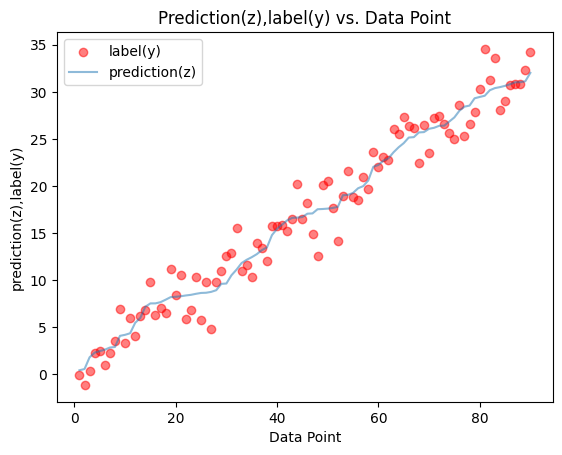

In [63]:
# create_plot(X_train,y_train)
# model = load_or_initialize_model(X_train,y_train)
model=modeltrain(X_train, y_train,l2_lambda=0.01)  # You can adjust the regularization st

pred=modeltest(X_test,y_test,model)

create_plot(X_test,y_test,pred)

In [64]:
#Function  to remove any one features and train the model

def remove_one_feature(feature1):
    #Data  proccessing and normalisation tried

    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')




    # Define a mapping from categories to numerical values
    if(feature1!='X3'):
    
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.
    X = df.drop(columns=['y',feature1])
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X


    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    X_test=X[train_size:]
    y_test=y[train_size:]
    model=modeltrain(X_train, y_train,l2_lambda=0.01)  # You can adjust the regularization st

    pred=modeltest(X_test,y_test,model)
    create_plot(X_test,y_test,pred)
    


In [65]:
#Function  to remove any two features and train the model

def remove_two_feature(feature1,feature2):

    #Data  proccessing and normalisation tried
    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')
    



   

    # Define a mapping from categories to numerical values
    if(feature1!='X3' and feature2!='X3'):
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.
    X = df.drop(columns=['y',feature1,feature2])
    y = df['y']
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X
   

    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    X_test=X[train_size:]
    y_test=y[train_size:]
    model=modeltrain(X_train, y_train,l2_lambda=0.01)  # You can adjust the regularization st

    pred=modeltest(X_test,y_test,model)
    # create_plot(X_test,y_test,pred)
    


Epoch [100/1000], Loss: 4.073141960893949
Epoch [200/1000], Loss: 3.9787329924834554
Epoch [300/1000], Loss: 3.9394930416450697
Epoch [400/1000], Loss: 3.921021521279887
Epoch [500/1000], Loss: 3.911629465326576
Epoch [600/1000], Loss: 3.9066234822003003
Epoch [700/1000], Loss: 3.903865022644208
Epoch [800/1000], Loss: 3.9023009025652864
Epoch [900/1000], Loss: 3.901388846395353
Epoch [1000/1000], Loss: 3.9008417137117415
Training Done
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 23.33%
Mean Absolute Error: 1.5110798414367719
Mean Squared Error: 3.6374445713968626
R-squared: 0.9602373336314721
weight: [[3.04310975 2.06910262]]
bias: [-0.21890317]


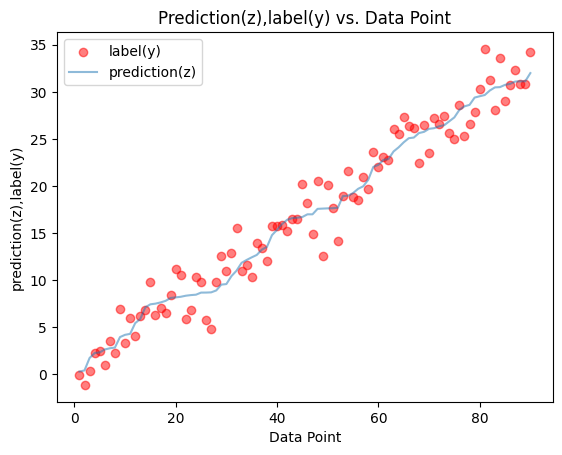

Epoch [100/1000], Loss: 5.092679062778024
Epoch [200/1000], Loss: 5.055681879403521
Epoch [300/1000], Loss: 5.0417912720745095
Epoch [400/1000], Loss: 5.036559697844337
Epoch [500/1000], Loss: 5.034579409652154
Epoch [600/1000], Loss: 5.033823793921249
Epoch [700/1000], Loss: 5.033531840524496
Epoch [800/1000], Loss: 5.0334168613893695
Epoch [900/1000], Loss: 5.03337029432445
Epoch [1000/1000], Loss: 5.03335068933296
Training Done
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 18.89%
Mean Absolute Error: 1.7368426545838478
Mean Squared Error: 4.649697813313062
R-squared: 0.9491719037262908
weight: [[3.0824603]]
bias: [0.61913454]


In [66]:
### You can uncomment these two to run the code for model predictions by removing one and two features respectively.
# remove_one_feature('X3')
# remove_two_feature('X2','X3')